### Model overview

In [1]:
import pandas as pd
import torch
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from src.myscripts.model import Conv1DClassifier
import os
import numpy as np
from matplotlib import pyplot as plt
import config

C:\Users\Bcom_\Documents\Projekty\Rozpoznawanie_dzwiekow_gitarowych\data\prepared_data


In [2]:
model_history_path = config.MODEL_HISTORY_DIR_PATH

def plot_model_losses(model_name):
    val_losses = np.load(os.path.join(model_history_path, f"{model_name}_val_losses.npy"))
    train_losses = np.load(os.path.join(model_history_path, f"{model_name}_train_losses.npy"))
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss', color='blue')
    plt.plot(val_losses, label='Validation Loss', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f"{model_name}'s loss over epochs")
    plt.legend()
    plt.grid(True)
    plt.show()

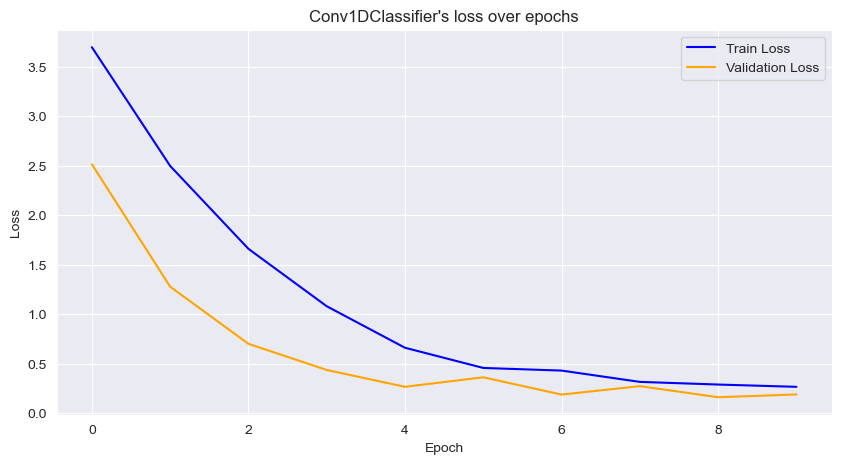

In [3]:
plot_model_losses("Conv1DClassifier")

C:\Users\Bcom_\AppData\Local\Temp\ipykernel_1092\759544766.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(model_path, f"{

Test Accuracy: 0.993


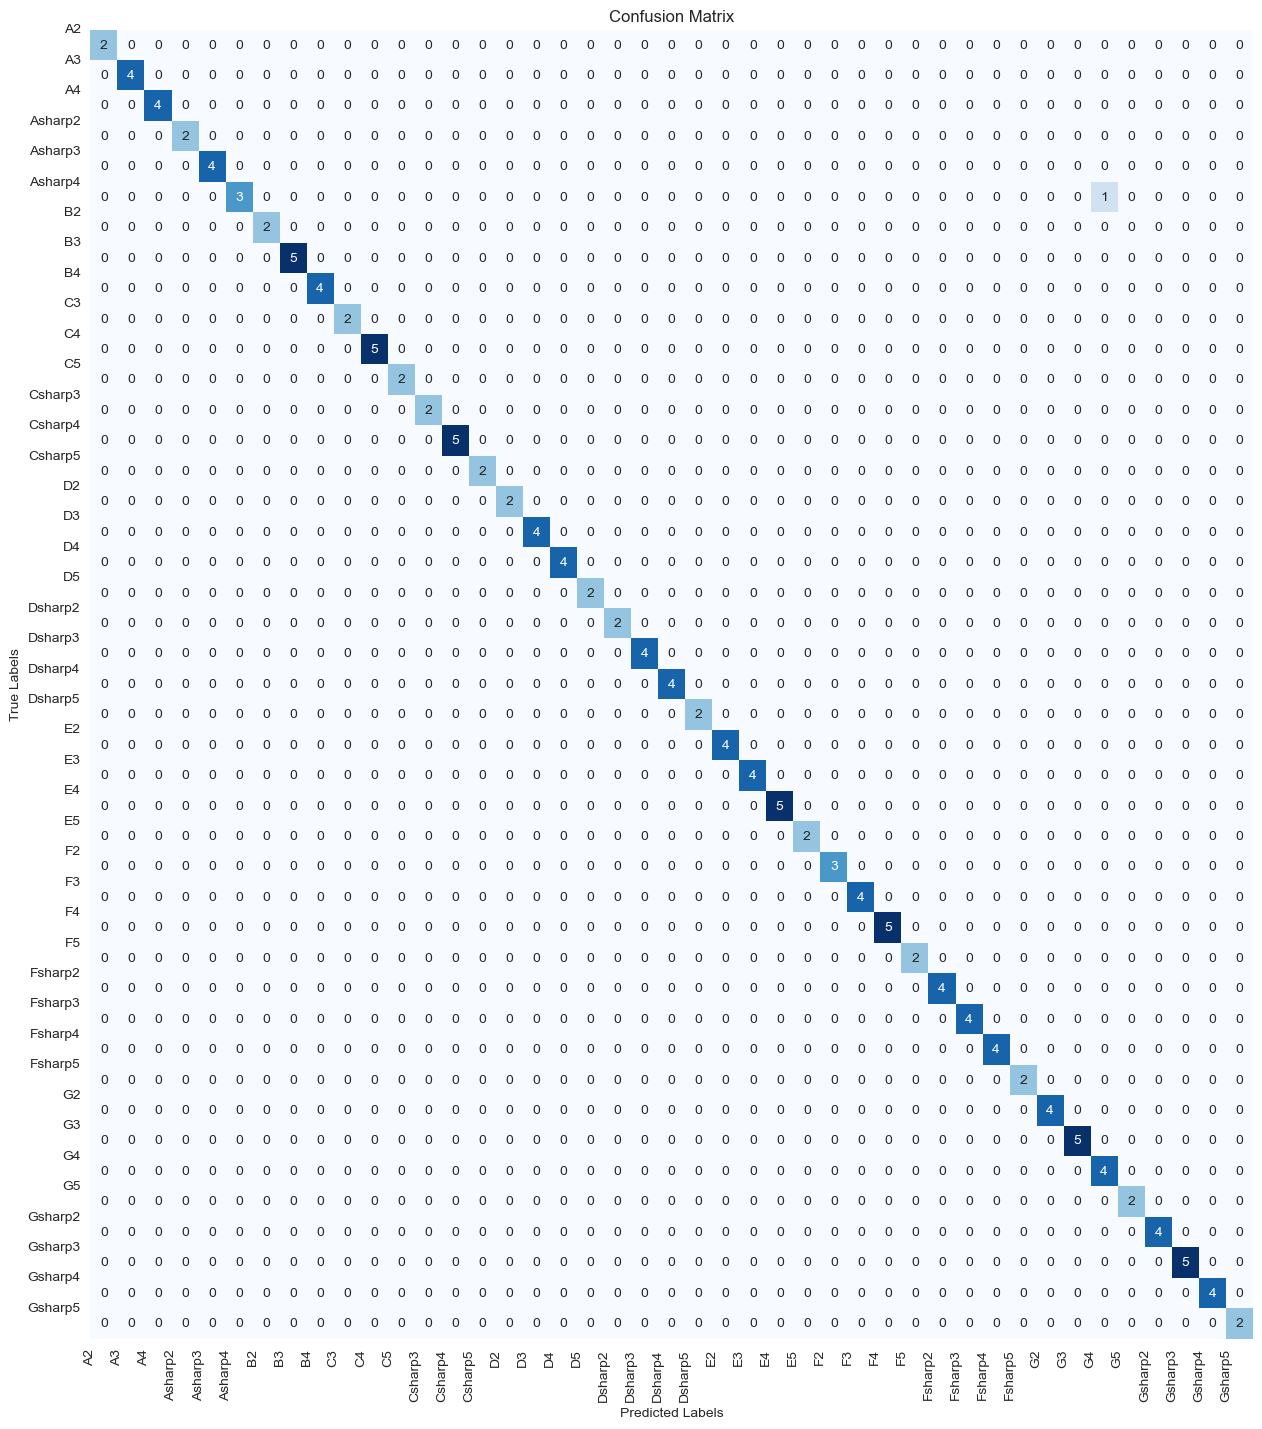

In [5]:
splits_path = config.DATA_SPLIT_SAVE_DIR_PATH
model_path  = config.MODEL_DIR_PATH
dataframes_path = config.DATAFRAMES_DIR_PATH
model_name = "Conv1DClassifier"
dataframe_file_name = "sound_data.csv"

x_test = np.load(os.path.join(splits_path, "x_test.npy"), allow_pickle=True)
y_test = np.load(os.path.join(splits_path, "y_test.npy"), allow_pickle=True)

x_test = x_test.astype(np.float32)
y_test = y_test.astype("long")

input_shape = x_test.shape[1:]
model = Conv1DClassifier(num_classes=43, input_shape=input_shape)
model.load_state_dict(torch.load(os.path.join(model_path, f"{model_name}.pth")))

#Przelaczenie modelu w tryb ewaluacji
model.eval()

x_test_tensor = torch.tensor(x_test).to("cpu")
with torch.no_grad():
    outputs = model(x_test_tensor)
    _, predictions = torch.max(outputs, 1)

predictions = predictions.cpu().numpy()

#Przekonwertowanie jezeli etykiety bylyby w One-hot
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    true_labels = np.argmax(y_test, axis=1)
else:
    true_labels = y_test

accuracy = accuracy_score(true_labels, predictions)
print(f'Test Accuracy: {accuracy:.3f}')

labels_to_map = np.unique(pd.read_csv(os.path.join(dataframes_path,f"{dataframe_file_name}")).iloc[:,-1])
conf_matrix = confusion_matrix(true_labels, predictions)

plt.figure(figsize=(15, 17))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(len(labels_to_map)), labels=labels_to_map, rotation=90)
plt.yticks(ticks=np.arange(len(labels_to_map)), labels=labels_to_map, rotation=0)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()